# 20201110
- 클래스로 구현하다가 path 리턴하는 부분에서 막힘

In [1]:
import heapq
import time
import random
import matplotlib.pyplot as plt

In [ ]:
class Node:
  def __init__(self, key, weights, h):
    self.key = key
    self.neighbors = None
    self.weights = weights
    self.f = 999
    self.g = 999
    self.h = h

In [ ]:
def heuristic(n):
          H_dist = {
              'A': 10,
              'B': 9,
              'C': 999,
              'D': 1,
              'E': 6,
              'G': 0,
              
          }
          return H_dist[n]

A = Node('A', [2, 3], heuristic('A')) # h value는 시작 노드, 도착 노드에 따라 바뀌므로 함수 사용
B = Node('B', [2, 1, 9], heuristic('B'))
C = Node('C', [1], heuristic('C'))
D = Node('D', [6, 1], heuristic('D'))
E = Node('E', [3, 6], heuristic('E'))
G = Node('G', [9, 1], heuristic('G'))
A.neighbors = [B, C]
B.neighbors = [A, C, G]
C.neighbors = [B]
D.neighbors = [E, G]
E.neighbors = [A, D]
G.neighbors = [B, D]

In [ ]:
def get_neighbors(parent):
    if parent in Graph:
        return [n[0] for n in Graph[parent][2:]]
    else:
        return None

In [8]:
def weight(current, parent):
    return [current.weights[idx] for idx, n in enumerate(current.neighbors) if n.key == parent.key][0]

In [ ]:
def is_empty(Q):
  for q in Q:
    if q != []: return False
  return True

In [ ]:
# class로 정의한 노드로 함수 구현
def aStarAlgo_Parallel(start, target, k):
        Q = [[] for _ in range(k)]

        start.g = 0                 # calculate g value of start_node
        start.f = start.g + start.h # calculate f value of start_node

        H = {} # H, closed list
        H[start.key] = (start.f, start.g)
        
        heapq.heappush(Q[0], (start.f, start)) 
        m = None
        
        prev = {}    # parents contains an adjacency map of all nodes
        prev[start.key] = start.key
                 
        while not is_empty(Q):
            S = []

            for i in range(k):
              if Q[i] == []:
                continue

              _, qi = heapq.heappop(Q[i])
              # print(f"qi: {qi}")
              if qi.key == target.key:
                if m == None or qi.f < m.f: # compare f value
                  m = qi
                  # print()
                  # print(f"m: {m}")
                  # print(Graph[m])
                continue 
              
              # S <- S + Expand(qi)
              for n in qi.neighbors:
                if n.key != prev[qi.key] and n.g > qi.g + weight(n, qi): # compare g value
                  n.g = qi.g + weight(n, qi)                             # update g value
                  n.f = n.g + n.h                                        # update f value

                if n.key not in H or H[n.key][0] > n.f:
                  S.append(n.key)
                  prev[n.key] = qi.key
                  
              # print(f"S: {S}")
            # end for 첫번째 블록
            
            if m != None:
              path = []
              print(f"shortist distance: {m.f}")
              while prev[m.key] != m.key:
                path.append(m.key)
                m = prev[m]
              path.append(s)
              path.reverse()
              return path
            
            T = []
            for s_prime in S:
              if s_prime in H and H[s_prime][1] < Graph[s_prime][1]:
                continue
              T.append(s_prime)
            # print(f"T: {T}")
            for t_prime in T:
              i = random.randint(0,k-1)
              heapq.heappush(Q[i], (Graph[t_prime][0], t_prime))
              H[t_prime] = (Graph[t_prime][0], Graph[t_prime][1])
            # print(f"H: {H}")
            # print()

In [ ]:
# # class로 수정되면 지우기
# def aStarAlgo_Parallel(s, t, k):
#         Q = [[] for _ in range(k)]

#         Graph[s][1] = 0                          # calculate g value of start_node
#         Graph[s][0] = Graph[s][1] + heuristic(s) # calculate f value of start_node

#         H = {} # H, closed list
#         H[s] = (Graph[s][0], Graph[s][1])
        
#         heapq.heappush(Q[0], (Graph[s][0], s)) 
#         m = None
        
#         prev = {}    # parents contains an adjacency map of all nodes
#         prev[s] = s
                 
#         while not is_empty(Q):
#             S = []

#             for i in range(k):
#               if Q[i] == []:
#                 continue

#               _, qi = heapq.heappop(Q[i])
#               # print(f"qi: {qi}")
#               if qi == t:
#                 if m == None or Graph[qi][0] < Graph[m][0]: # compare f value
#                   m = qi
#                   # print()
#                   # print(f"m: {m}")
#                   # print(Graph[m])
#                 continue 
              
#               # S <- S + Expand(qi)
#               for n in get_neighbors(qi):
#                 if n != prev[qi] and Graph[n][1] > Graph[qi][1] + weight(n, qi): # compare g value
#                   Graph[n][1] = Graph[qi][1] + weight(n, qi)                     # update g value
#                   Graph[n][0] = Graph[n][1] + heuristic(n)                       # update f value

#                 if n not in H or H[n][0] > Graph[n][0]:
#                   S.append(n)
#                   prev[n] = qi
                  
#               # print(f"S: {S}")
#             # end for 첫번째 블록
            
#             if m != None:
#               path = []
#               print(f"shortist distance: {Graph[m][0]}")
#               while prev[m] != m:
#                 path.append(m)
#                 m = prev[m]
#               path.append(s)
#               path.reverse()
#               return path
            
#             T = []
#             for s_prime in S:
#               if s_prime in H and H[s_prime][1] < Graph[s_prime][1]:
#                 continue
#               T.append(s_prime)
#             # print(f"T: {T}")
#             for t_prime in T:
#               i = random.randint(0,k-1)
#               heapq.heappush(Q[i], (Graph[t_prime][0], t_prime))
#               H[t_prime] = (Graph[t_prime][0], Graph[t_prime][1])
#             # print(f"H: {H}")
#             # print()

In [ ]:
# 1 priority queue example 1
T1 = []
for i in range(10):
  s = time.time()
  Graph = {
      'A': [999, 999, ('B', 2), ('E', 3)], # f value, g value 순
      'B': [999, 999, ('A', 2), ('C', 1),('G', 9)],
      'C': [999, 999, ('B', 1)],
      'D': [999, 999, ('E', 6), ('G', 1)],
      'E': [999, 999, ('A', 3), ('D', 6)],
      'G': [999, 999, ('B', 9), ('D', 1)]
  }

  def heuristic(n):
          H_dist = {
              'A': 10,
              'B': 9,
              'C': 999,
              'D': 1,
              'E': 6,
              'G': 0,
              
          }
          return H_dist[n]

  path = aStarAlgo_Parallel('A', 'G', 1)
  print(path)
  t = time.time() - s
  
  T1.append(t)

shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']


In [ ]:
# 1 priority queue example 1
T2 = []
for i in range(10):
  s = time.time()
  Graph = {
      'A': [999, 999, ('B', 7), ('C', 2), ('D', 3)], # f value, g value 순
      'B': [999, 999, ('A', 7), ('C', 3), ('E', 4)],
      'C': [999, 999, ('A', 2), ('B', 3), ('E', 4), ('F', 1)],
      'D': [999, 999, ('A', 3), ('J', 2)],
      'E': [999, 999, ('B', 4), ('C', 4), ('H', 5)],
      'F': [999, 999, ('C', 1), ('H', 3), ('I', 2)],
      'G': [999, 999, ('I', 2), ('M', 5)],
      'H': [999, 999, ('E', 5), ('F', 3)],
      'I': [999, 999, ('F', 2), ('G', 2)],
      'J': [999, 999, ('D', 2), ('K', 4), ('L', 4)],
      'K': [999, 999, ('J', 4), ('L', 6), ('M', 4)],
      'L': [999, 999, ('J', 4), ('K', 6), ('M', 4)],
      'M': [999, 999, ('G', 5), ('K', 4), ('L', 4)],
  }

  def heuristic(n):
          H_dist = {
              'A': 10,
              'B': 9,
              'C': 7,
              'D': 8,
              'E': 8,
              'F': 6,
              'G': 0,
              'H': 6,
              'I': 3,
              'J': 6,
              'K': 4,
              'L': 4,
              'M': 3,             
          }
          return H_dist[n]
        
  path = aStarAlgo_Parallel('A', 'G', 1)
  print(path)
  t = time.time() - s
  T2.append(t)

shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']


In [ ]:
# 2 priority queues example 1
T3 = []
for i in range(10):
  s = time.time()
  Graph = {
      'A': [999, 999, ('B', 2), ('E', 3)], # f value, g value 순
      'B': [999, 999, ('A', 2), ('C', 1),('G', 9)],
      'C': [999, 999, ('B', 1)],
      'E': [999, 999, ('A', 3), ('D', 6)],
      'D': [999, 999, ('E', 6), ('G', 1)],
      'G': [999, 999, ('B', 9), ('D', 1)]
  }

  def heuristic(n):
          H_dist = {
              'A': 10,
              'B': 9,
              'C': 999,
              'D': 1,
              'E': 6,
              'G': 0,
              
          }
          return H_dist[n]

  path = aStarAlgo_Parallel('A', 'G', 2)
  print(path)
  t = time.time() - s
  T3.append(t)

shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'B', 'G']
shortist distance: 10
['A', 'B', 'G']


In [ ]:
# 2 priority queues example 2
T4 = []
for i in range(10):
  s = time.time()
  Graph = {
      'A': [999, 999, ('B', 7), ('C', 2), ('D', 3)], # f value, g value 순
      'B': [999, 999, ('A', 7), ('C', 3), ('E', 4)],
      'C': [999, 999, ('A', 2), ('B', 3), ('E', 4), ('F', 1)],
      'D': [999, 999, ('A', 3), ('J', 2)],
      'E': [999, 999, ('B', 4), ('C', 4), ('H', 5)],
      'F': [999, 999, ('C', 1), ('H', 3), ('I', 2)],
      'G': [999, 999, ('I', 2), ('M', 5)],
      'H': [999, 999, ('E', 5), ('F', 3)],
      'I': [999, 999, ('F', 2), ('G', 2)],
      'J': [999, 999, ('D', 2), ('K', 4), ('L', 4)],
      'K': [999, 999, ('J', 4), ('L', 6), ('M', 4)],
      'L': [999, 999, ('J', 4), ('K', 6), ('M', 4)],
      'M': [999, 999, ('G', 5), ('K', 4), ('L', 4)],
  }

  def heuristic(n):
          H_dist = {
              'A': 10,
              'B': 9,
              'C': 7,
              'D': 8,
              'E': 8,
              'F': 6,
              'G': 0,
              'H': 6,
              'I': 3,
              'J': 6,
              'K': 4,
              'L': 4,
              'M': 3,             
          }
          return H_dist[n]
        
  path = aStarAlgo_Parallel('A', 'G', 2)
  print(path)
  t = time.time() - s
  T4.append(t)

shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']


In [ ]:
# 3 priority queues example 1
T5 = []
for i in range(10):
  s = time.time()
  Graph = {
      'A': [999, 999, ('B', 2), ('E', 3)], # f value, g value 순
      'B': [999, 999, ('A', 2), ('C', 1),('G', 9)],
      'C': [999, 999, ('B', 1)],
      'E': [999, 999, ('A', 3), ('D', 6)],
      'D': [999, 999, ('E', 6), ('G', 1)],
      'G': [999, 999, ('B', 9), ('D', 1)]
  }

  def heuristic(n):
          H_dist = {
              'A': 10,
              'B': 9,
              'C': 999,
              'D': 1,
              'E': 6,
              'G': 0,
              
          }
          return H_dist[n]

  path = aStarAlgo_Parallel('A', 'G', 3)
  print(path)
  t = time.time() - s
  T5.append(t)

shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'B', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'B', 'G']


In [ ]:
# 3 priority queues example 2
T6 = []
for i in range(10):
  s = time.time()
  Graph = {
      'A': [999, 999, ('B', 7), ('C', 2), ('D', 3)], # f value, g value 순
      'B': [999, 999, ('A', 7), ('C', 3), ('E', 4)],
      'C': [999, 999, ('A', 2), ('B', 3), ('E', 4), ('F', 1)],
      'D': [999, 999, ('A', 3), ('J', 2)],
      'E': [999, 999, ('B', 4), ('C', 4), ('H', 5)],
      'F': [999, 999, ('C', 1), ('H', 3), ('I', 2)],
      'G': [999, 999, ('I', 2), ('M', 5)],
      'H': [999, 999, ('E', 5), ('F', 3)],
      'I': [999, 999, ('F', 2), ('G', 2)],
      'J': [999, 999, ('D', 2), ('K', 4), ('L', 4)],
      'K': [999, 999, ('J', 4), ('L', 6), ('M', 4)],
      'L': [999, 999, ('J', 4), ('K', 6), ('M', 4)],
      'M': [999, 999, ('G', 5), ('K', 4), ('L', 4)],
  }

  def heuristic(n):
          H_dist = {
              'A': 10,
              'B': 9,
              'C': 7,
              'D': 8,
              'E': 8,
              'F': 6,
              'G': 0,
              'H': 6,
              'I': 3,
              'J': 6,
              'K': 4,
              'L': 4,
              'M': 3,             
          }
          return H_dist[n]
        
  path = aStarAlgo_Parallel('A', 'G', 3)
  print(path)
  t = time.time() - s
  T6.append(t)

shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']


In [ ]:
# 4 priority queues example 1
T7 = []
for i in range(10):
  s = time.time()
  Graph = {
      'A': [999, 999, ('B', 2), ('E', 3)], # f value, g value 순
      'B': [999, 999, ('A', 2), ('C', 1),('G', 9)],
      'C': [999, 999, ('B', 1)],
      'E': [999, 999, ('A', 3), ('D', 6)],
      'D': [999, 999, ('E', 6), ('G', 1)],
      'G': [999, 999, ('B', 9), ('D', 1)]
  }

  def heuristic(n):
          H_dist = {
              'A': 10,
              'B': 9,
              'C': 999,
              'D': 1,
              'E': 6,
              'G': 0,
              
          }
          return H_dist[n]

  path = aStarAlgo_Parallel('A', 'G', 4)
  print(path)
  t = time.time() - s
  T7.append(t)

shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'B', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']


In [ ]:
# 4 priority queues example 2
T8 = []
for i in range(10):
  s = time.time()
  Graph = {
      'A': [999, 999, ('B', 7), ('C', 2), ('D', 3)], # f value, g value 순
      'B': [999, 999, ('A', 7), ('C', 3), ('E', 4)],
      'C': [999, 999, ('A', 2), ('B', 3), ('E', 4), ('F', 1)],
      'D': [999, 999, ('A', 3), ('J', 2)],
      'E': [999, 999, ('B', 4), ('C', 4), ('H', 5)],
      'F': [999, 999, ('C', 1), ('H', 3), ('I', 2)],
      'G': [999, 999, ('I', 2), ('M', 5)],
      'H': [999, 999, ('E', 5), ('F', 3)],
      'I': [999, 999, ('F', 2), ('G', 2)],
      'J': [999, 999, ('D', 2), ('K', 4), ('L', 4)],
      'K': [999, 999, ('J', 4), ('L', 6), ('M', 4)],
      'L': [999, 999, ('J', 4), ('K', 6), ('M', 4)],
      'M': [999, 999, ('G', 5), ('K', 4), ('L', 4)],
  }

  def heuristic(n):
          H_dist = {
              'A': 10,
              'B': 9,
              'C': 7,
              'D': 8,
              'E': 8,
              'F': 6,
              'G': 0,
              'H': 6,
              'I': 3,
              'J': 6,
              'K': 4,
              'L': 4,
              'M': 3,             
          }
          return H_dist[n]
        
  path = aStarAlgo_Parallel('A', 'G', 4)
  print(path)
  t = time.time() - s
  T8.append(t)

shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']


In [ ]:
# 5 priority queues example 1
T9 = []
for i in range(10):
  s = time.time()
  Graph = {
      'A': [999, 999, ('B', 2), ('E', 3)], # f value, g value 순
      'B': [999, 999, ('A', 2), ('C', 1),('G', 9)],
      'C': [999, 999, ('B', 1)],
      'E': [999, 999, ('A', 3), ('D', 6)],
      'D': [999, 999, ('E', 6), ('G', 1)],
      'G': [999, 999, ('B', 9), ('D', 1)]
  }

  def heuristic(n):
          H_dist = {
              'A': 10,
              'B': 9,
              'C': 999,
              'D': 1,
              'E': 6,
              'G': 0,
              
          }
          return H_dist[n]

  path = aStarAlgo_Parallel('A', 'G', 5)
  print(path)
  t = time.time() - s
  T9.append(t)

shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']
shortist distance: 10
['A', 'E', 'D', 'G']


In [ ]:
# 4 priority queues example 2
T10 = []
for i in range(10):
  s = time.time()
  Graph = {
      'A': [999, 999, ('B', 7), ('C', 2), ('D', 3)], # f value, g value 순
      'B': [999, 999, ('A', 7), ('C', 3), ('E', 4)],
      'C': [999, 999, ('A', 2), ('B', 3), ('E', 4), ('F', 1)],
      'D': [999, 999, ('A', 3), ('J', 2)],
      'E': [999, 999, ('B', 4), ('C', 4), ('H', 5)],
      'F': [999, 999, ('C', 1), ('H', 3), ('I', 2)],
      'G': [999, 999, ('I', 2), ('M', 5)],
      'H': [999, 999, ('E', 5), ('F', 3)],
      'I': [999, 999, ('F', 2), ('G', 2)],
      'J': [999, 999, ('D', 2), ('K', 4), ('L', 4)],
      'K': [999, 999, ('J', 4), ('L', 6), ('M', 4)],
      'L': [999, 999, ('J', 4), ('K', 6), ('M', 4)],
      'M': [999, 999, ('G', 5), ('K', 4), ('L', 4)],
  }

  def heuristic(n):
          H_dist = {
              'A': 10,
              'B': 9,
              'C': 7,
              'D': 8,
              'E': 8,
              'F': 6,
              'G': 0,
              'H': 6,
              'I': 3,
              'J': 6,
              'K': 4,
              'L': 4,
              'M': 3,             
          }
          return H_dist[n]
        
  path = aStarAlgo_Parallel('A', 'G', 5)
  print(path)
  t = time.time() - s
  T10.append(t)

shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']
shortist distance: 7
['A', 'C', 'F', 'I', 'G']


In [ ]:
t1 = sum(T1)/len(T1)
t2 = sum(T2)/len(T2)
t3 = sum(T3)/len(T3)
t4 = sum(T4)/len(T4)
t5 = sum(T5)/len(T5)
t6 = sum(T6)/len(T6)
t7 = sum(T7)/len(T7)
t8 = sum(T8)/len(T8)
t9 = sum(T9)/len(T9)
t10 = sum(T10)/len(T10)

In [ ]:
print("A_star with 1 priority queue")
print(f"example 1: {t1}s")
print(f"example 2: {t2}s")
print()
print("A_star with 2 priority queues")
print(f"example 1: {t3}s")
print(f"example 2: {t4}s")
print()
print("A_star with 3 priority queues")
print(f"example 1: {t5}s")
print(f"example 2: {t6}s")
print()
print("A_star with 4 priority queues")
print(f"example 1: {t7}s")
print(f"example 2: {t8}s")
print()
print("A_star with 5 priority queues")
print(f"example 1: {t9}s")
print(f"example 2: {t10}s")

A_star with 1 priority queue
example 1: 0.00011172294616699219s
example 2: 0.00023107528686523439s

A_star with 2 priority queues
example 1: 0.00011696815490722657s
example 2: 0.00015816688537597656s

A_star with 3 priority queues
example 1: 0.000118255615234375s
example 2: 0.00016727447509765626s

A_star with 4 priority queues
example 1: 0.00014154911041259767s
example 2: 0.00029735565185546876s

A_star with 5 priority queues
example 1: 0.00011546611785888672s
example 2: 0.00018248558044433593s


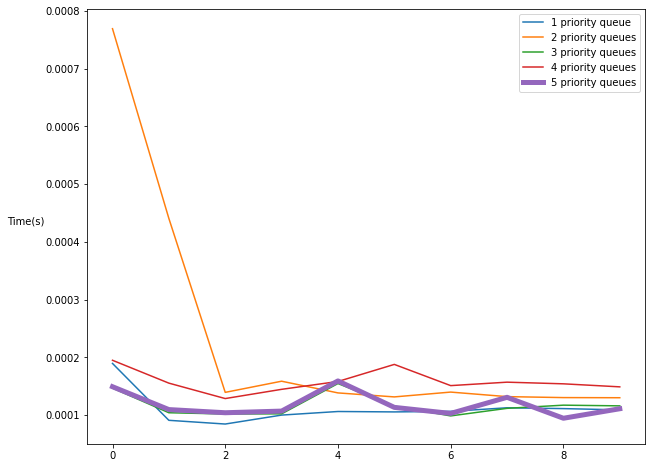

In [ ]:
x = range(10)
plt.figure(figsize=(10,8))
plt.plot(x, T1, label='1 priority queue')
plt.plot(x, T2, label='2 priority queues')
plt.plot(x, T3, label='3 priority queues')
plt.plot(x, T4, label='4 priority queues')
plt.plot(x, T5, label='5 priority queues', linewidth=5)
plt.ylabel("Time(s)          ", rotation=0)
plt.legend()
plt.show()

In [ ]:
def aStarAlgo_Parallel(s, t, k):
        Q = [[] for _ in range(k)]

        Graph[s][1] = 0                          # calculate g value of start_node
        Graph[s][0] = Graph[s][1] + heuristic(s) # calculate f value of start_node

        H = {} # H, closed list
        H[s] = (Graph[s][0], Graph[s][1])
        
        heapq.heappush(Q[0], (Graph[s][0], s)) 
        m = None
        
        prev = {}    # parents contains an adjacency map of all nodes
        prev[s] = s
                 
        while not is_empty(Q):
            S = []

            for i in range(k):
              if Q[i] == []:
                continue

              _, qi = heapq.heappop(Q[i])
              if qi == t:
                if m == None or Graph[qi][0] < Graph[m][0]: # compare f value
                  m = qi
                continue 
              
              # S <- S + Expand(qi)
              for n in get_neighbors(qi):
                if n != prev[qi] and Graph[n][1] > Graph[qi][1] + weight(n, qi): # compare g value
                  Graph[n][1] = Graph[qi][1] + weight(n, qi)                     # update g value
                  Graph[n][0] = Graph[n][1] + heuristic(n)                       # update f value

                if n not in H or H[n][0] > Graph[n][0]:
                  S.append(n)
                  prev[n] = qi

            
            if m != None:
              path = []
              print(f"shortist distance: {Graph[m][0]}")
              while prev[m] != m:
                path.append(m)
                m = prev[m]
              path.append(s)
              path.reverse()
              return path
            
            T = []
            for s_prime in S:
              if s_prime in H and H[s_prime][1] < Graph[s_prime][1]:
                continue
              T.append(s_prime)
            for t_prime in T:
              i = random.randint(0,k-1)
              heapq.heappush(Q[i], (Graph[t_prime][0], t_prime))
              H[t_prime] = (Graph[t_prime][0], Graph[t_prime][1])

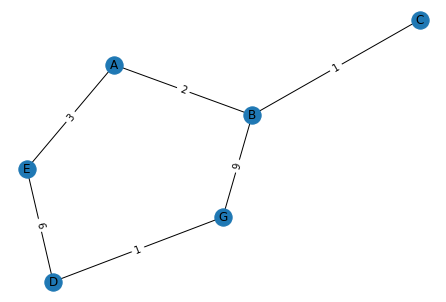

In [ ]:
import networkx as nx

G = nx.Graph()

G.add_edge('A', 'B', weight=2)
G.add_edge('A', 'E', weight=3)
G.add_edge('B', 'C', weight=1)
G.add_edge('B', 'G', weight=9)
G.add_edge('D', 'E', weight=6)
G.add_edge('D', 'G', weight=1)

pos = nx.spring_layout(G)

weights = list(nx.get_edge_attributes(G, 'weight').values())

nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

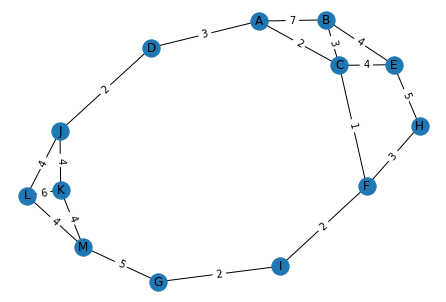

In [ ]:
G = nx.Graph()

G.add_edge('A', 'B', weight=7)
G.add_edge('A', 'C', weight=2)
G.add_edge('A', 'D', weight=3)
G.add_edge('B', 'C', weight=3)
G.add_edge('B', 'E', weight=4)
G.add_edge('C', 'E', weight=4)
G.add_edge('C', 'F', weight=1)
G.add_edge('D', 'J', weight=2)
G.add_edge('E', 'H', weight=5)
G.add_edge('F', 'H', weight=3)
G.add_edge('F', 'I', weight=2)
G.add_edge('G', 'I', weight=2)
G.add_edge('G', 'M', weight=5)
G.add_edge('J', 'K', weight=4)
G.add_edge('J', 'L', weight=4)
G.add_edge('K', 'L', weight=6)
G.add_edge('K', 'M', weight=4)
G.add_edge('L', 'M', weight=4)

pos = nx.spring_layout(G)

weights = list(nx.get_edge_attributes(G, 'weight').values())

nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()